In [11]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
a = 0 
b = 100
x = 50
p = 0.5
P = 8


N = (3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 150, 200, 500)
time = np.zeros(len(N))
time_without_OMP = np.zeros(len(N))

for i in range(0, len(N)):
    #take the average time for 10 measurements
    for j in range(0, 10):
        subprocess.call(["gcc", "MonteCarlo_openMP.c", "-o", "runOMP", "-fopenmp"])
        subprocess.call(["./runOMP", str(a), str(b), str(x), str(N[i]), str(p), str(P)])
        
        with open("stats.txt") as file:
            line = file.readline()
            t = float(line.split()[2])
            time[i] += t
    
    for j in range(0, 10):
        subprocess.call(["gcc", "MonteCarlo.c", "-o", "run"])
        subprocess.call(["./run", str(a), str(b), str(x), str(N[i]), str(p), str(P)])
        
        with open("stats.txt") as file:
            line = file.readline()
            t = float(line.split()[2])
            time_without_OMP[i] += t

time = time / 10
time_without_OMP = time_without_OMP / 10

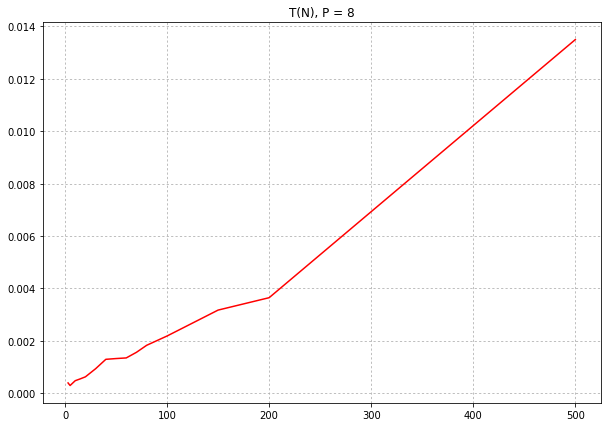

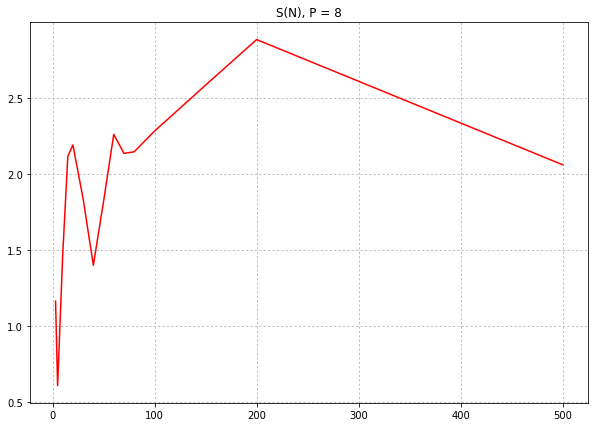

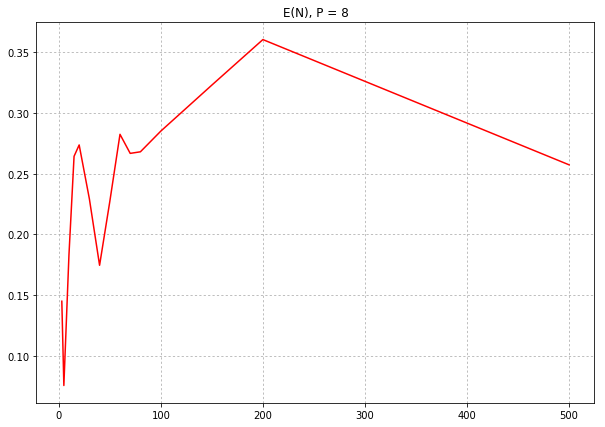

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(N, time, color='red')
plt.title("T(N), P = 8")
plt.grid(ls=':')
plt.show()

S = time_without_OMP / time

plt.figure(figsize=(10, 7))
plt.plot(N, S, color='red')
plt.title("S(N), P = 8")
plt.grid(ls=':')
plt.show()

E = S / P

plt.figure(figsize=(10, 7))
plt.plot(N, E, color='red')
plt.title("E(N), P = 8")
plt.grid(ls=':')
plt.show()

In [14]:
P = (1, 2, 4, 8, 16)
N = 300

time = np.zeros(len(P))
time_without_OMP = np.zeros(len(P))

for i in range(0, len(P)):
    #берем среднее время по 10 замерам
    for j in range(0, 10):
        subprocess.call(["gcc", "MonteCarlo_openMP.c", "-o", "runOMP", "-fopenmp"])
        subprocess.call(["./runOMP", str(a), str(b), str(x), str(N), str(p), str(P[i])])
        
        with open("stats.txt") as file:
            line = file.readline()
            t = float(line.split()[2])
            time[i] += t
    
    for j in range(0, 10):
        subprocess.call(["gcc", "MonteCarlo.c", "-o", "run"])
        subprocess.call(["./run", str(a), str(b), str(x), str(N), str(p), str(P[i])])
        
        with open("stats.txt") as file:
            line = file.readline()
            t = float(line.split()[2])
            time_without_OMP[i] += t

time = time / 10
time_without_OMP = time_without_OMP / 10

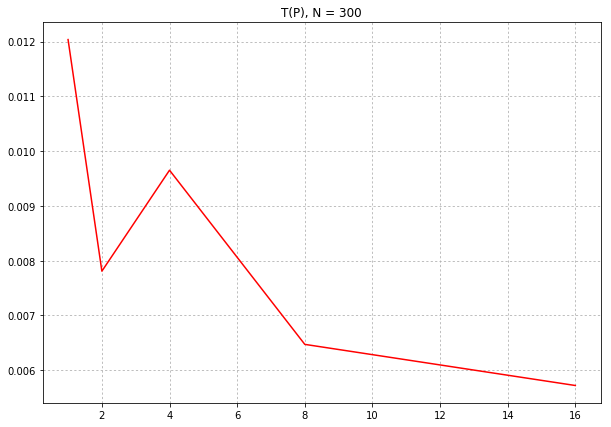

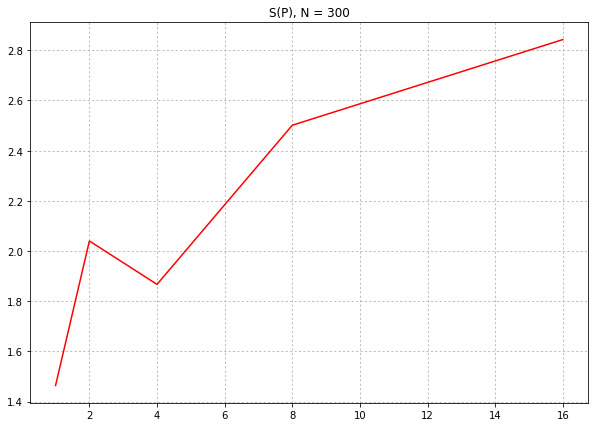

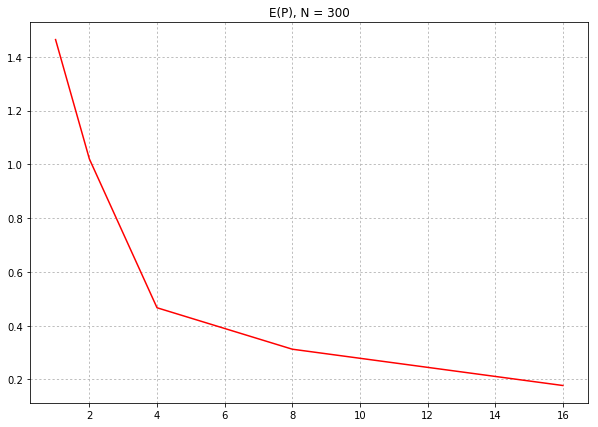

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(P, time, color='red')
plt.title('T(P), N = 300')
plt.grid(ls=':')
plt.show()

S = time_without_OMP / time

plt.figure(figsize=(10, 7))
plt.plot(P, S, color='red')
plt.title('S(P), N = 300')
plt.grid(ls=':')
plt.show()

E = S / P

plt.figure(figsize=(10, 7))
plt.plot(P, E, color='red')
plt.title('E(P), N = 300')
plt.grid(ls=':')
plt.show()